In [106]:
from google.colab import files
uploaded=files.upload()

Saving ab.csv to ab (2).csv


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sn


In [108]:
df = pd.read_csv("ab.csv")
#df_new = df[np.isfinite(df).all(1)]

In [109]:
print(df)
print(df.dtypes)

      temp_norm  rain_norm   ph_norm       label      Place
0      0.001925   0.018435  0.281972       apple  Faridabad
1      0.001415   0.407643  0.303250       apple       Pune
2      0.000424   0.359767  0.304005       apple       Dhar
3      0.001544   0.035572  0.308501       apple       Pune
4      0.001492   0.198438  0.312065       apple     Kangra
...         ...        ...       ...         ...        ...
1594   0.000407   0.208737  0.453085  watermelon  Bangalore
1595   0.000226   0.026650  0.464788  watermelon       Pune
1596   0.000104   0.021287  0.466186  watermelon  Bangalore
1597   0.006178   0.707041  0.466262  watermelon       Pune
1598   0.002815   0.348359  0.476495  watermelon       Pune

[1599 rows x 5 columns]
temp_norm    float64
rain_norm    float64
ph_norm      float64
label         object
Place         object
dtype: object


           rain_norm   ph_norm  temp_norm
rain_norm   1.000000  0.019534  -0.046961
ph_norm     0.019534  1.000000   0.025181
temp_norm  -0.046961  0.025181   1.000000


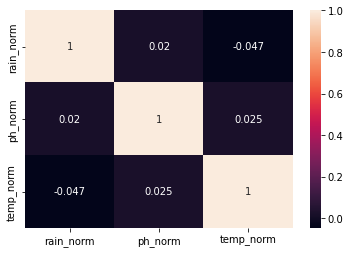

In [110]:
numeric_col=['rain_norm','ph_norm','temp_norm']
corr_matrix = df.loc[:,numeric_col].corr()
print(corr_matrix)
sn.heatmap(corr_matrix, annot= True)

In [111]:
from sklearn.model_selection import train_test_split
x = df.drop(['label'],axis =1)
y = df['label']
##Splitting the dataset into 80% trainin and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.20,random_state = 0)


In [112]:
##defining the error matrix
import numpy as np
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual-Y_Predicted)/Y_actual))*100
    return mape

In [116]:
#from pandas import errors
##Build the model
#X_train= X.apply(pd.to_numeric, errors='coerce')
#Y_train= Y.apply(pd.to_numeric,errors='coerce')
from sklearn.neighbors import KNeighborsRegressor
KNN_model  = KNeighborsRegressor(n_neighbors = 1)
KNN_model.fit(X_train, Y_train)


ValueError: ignored

In [ ]:
###predicting the test data 
KNN_predict = KNN_model.predict(X_test)
#print(KNN_predict)


ValueError: ignored

In [ ]:
###Accuracy Check
##Using MAPE error metrics to check for the error rate and accuracy level
KNN_MAPE = MAPE(Y_test, KNN_predict)
Accuracy_KNN =100 -KNN_MAPE
print("MAPE: ",KNN_MAPE)
print('Accuracy of KNN model:{:0.2f}%.'.format(Accuracy_KNN))


In [ ]:
KNN_model.fit(X_train, Y_train)

In [ ]:
temp=input('Enter normal value of temperature: ')
rain=input('Enter normal value of rainfall: ')
user_input = np.array([[temp, rain ]])
prediction = KNN_model.predict(user_input)
t= prediction[0]
print(t)

In [ ]:
row = df.loc[df['ph_norm']==t]
print(row)
index = row.index
print(index)